In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [4]:
def get_values_from_df(df):
    values = []
    for a in df.values:
        values.extend(a)
    return values

In [25]:
def plot_differences(classI_file, classII_file):
    classI = pd.read_csv(classI_file, index_col=0)
    classII = pd.read_csv(classII_file, index_col=0)
    print classI.shape, classII.shape
    
    classI_values = pd.Series(get_values_from_df(classI))
    classII_values = pd.Series(get_values_from_df(classII))
    
    df = pd.DataFrame({'ClassI': classI_values, 'ClassII': classII_values})
    df['difference'] = df.ClassII - df.ClassI
    df['difference'].hist(bins=100)
    plt.show()
    plt.clf()
    return df

(7085, 1018) (7085, 1018)


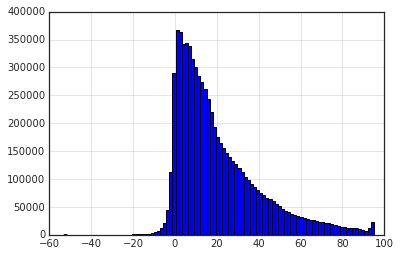

In [26]:
classI_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.csv'
classII_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv'
cancer_df = plot_differences(classI_file, classII_file)

(2611, 921) (2611, 921)


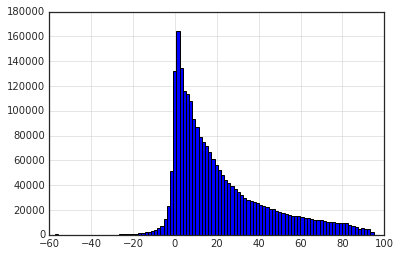

In [27]:
classI_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.germline.class_i.csv'
classII_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.germline.class_ii.csv'
germline_df = plot_differences(classI_file, classII_file)

(7085, 912) (7085, 912)


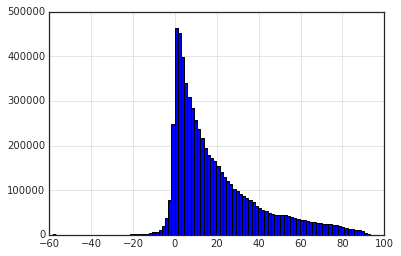

In [28]:
classI_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.passenger.class_i.csv'
classII_file = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.passenger.class_ii.csv'
passenger_df = plot_differences(classI_file, classII_file)

In [29]:
cancer_df.difference.describe()

count    7.212530e+06
mean     2.058008e+01
std      2.016416e+01
min     -5.301695e+01
25%      5.675738e+00
50%      1.453500e+01
75%      3.003080e+01
max      9.497092e+01
Name: difference, dtype: float64

In [30]:
germline_df.difference.describe()

count    2.404731e+06
mean     2.142803e+01
std      2.256984e+01
min     -5.716482e+01
25%      4.335621e+00
50%      1.390931e+01
75%      3.236926e+01
max      9.494025e+01
Name: difference, dtype: float64

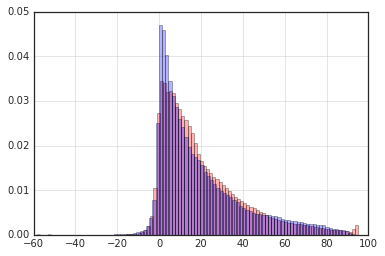

In [39]:
cancer_df['difference'].hist(bins=100, alpha=0.3, normed=True, color='r')
#germline_df['difference'].hist(bins=100, alpha=0.3, normed=True, color='g')
passenger_df['difference'].hist(bins=100, alpha=0.3, normed=True, color='b')

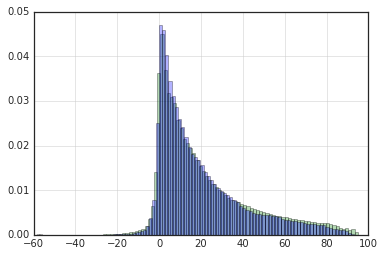

In [43]:
germline_df['difference'].hist(bins=100, alpha=0.3, normed=True, color='g')
passenger_df['difference'].hist(bins=100, alpha=0.3, normed=True, color='b')